# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import math
%matplotlib inline
df = pd.read_csv('billboard.csv')
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63,49,...,*,*,*,*,*,*,*,*,*,*
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8,6,...,*,*,*,*,*,*,*,*,*,*
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48,43,...,*,*,*,*,*,*,*,*,*,*
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23,18,...,*,*,*,*,*,*,*,*,*,*
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47,45,...,*,*,*,*,*,*,*,*,*,*


##### Write a brief description of your data, and any interesting observations you've made thus far. 

The dataset includes general information about top songs from the year 2000 as well its billboard chart info (ie: the date it entered the charts, the date it peaked, and the position it held each week).

The data will require cleaning, namely standardizing format for artist name, time, dates, etc). 

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. Explain your rationale for the way you choose to "impute" the missing data.

In [2]:
"""This will take any artist's name that is 'Last, First' and reverse to be First Last so that
it matches format of the other artists"""

def nameswitch(value):
    if "," in value:
        for i in range(len(value)):
            if value[i] == ",":
                return value[i+2:len(value)] + " " + value[:i] 
    else:
        return value
            

artistdf = df['artist.inverted'].to_frame()
df['artist.inverted'] = artistdf.applymap(nameswitch)
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63,49,...,*,*,*,*,*,*,*,*,*,*
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8,6,...,*,*,*,*,*,*,*,*,*,*
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48,43,...,*,*,*,*,*,*,*,*,*,*
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23,18,...,*,*,*,*,*,*,*,*,*,*
4,2000,Christina Aguilera,Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47,45,...,*,*,*,*,*,*,*,*,*,*


In [3]:
'''This renames the columns to be more clear'''

df.columns = [u'year', u'artist', u'track', u'song.length', u'genre',
       u'date.entered', u'date.peaked', u'x1st.week', u'x2nd.week',
       u'x3rd.week', u'x4th.week', u'x5th.week', u'x6th.week', u'x7th.week',
       u'x8th.week', u'x9th.week', u'x10th.week', u'x11th.week', u'x12th.week',
       u'x13th.week', u'x14th.week', u'x15th.week', u'x16th.week',
       u'x17th.week', u'x18th.week', u'x19th.week', u'x20th.week',
       u'x21st.week', u'x22nd.week', u'x23rd.week', u'x24th.week',
       u'x25th.week', u'x26th.week', u'x27th.week', u'x28th.week',
       u'x29th.week', u'x30th.week', u'x31st.week', u'x32nd.week',
       u'x33rd.week', u'x34th.week', u'x35th.week', u'x36th.week',
       u'x37th.week', u'x38th.week', u'x39th.week', u'x40th.week',
       u'x41st.week', u'x42nd.week', u'x43rd.week', u'x44th.week',
       u'x45th.week', u'x46th.week', u'x47th.week', u'x48th.week',
       u'x49th.week', u'x50th.week', u'x51st.week', u'x52nd.week',
       u'x53rd.week', u'x54th.week', u'x55th.week', u'x56th.week',
       u'x57th.week', u'x58th.week', u'x59th.week', u'x60th.week',
       u'x61st.week', u'x62nd.week', u'x63rd.week', u'x64th.week',
       u'x65th.week', u'x66th.week', u'x67th.week', u'x68th.week',
       u'x69th.week', u'x70th.week', u'x71st.week', u'x72nd.week',
       u'x73rd.week', u'x74th.week', u'x75th.week', u'x76th.week']
df.head()

,year,artist,track,song.length,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63,49,...,*,*,*,*,*,*,*,*,*,*
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8,6,...,*,*,*,*,*,*,*,*,*,*
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48,43,...,*,*,*,*,*,*,*,*,*,*
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23,18,...,*,*,*,*,*,*,*,*,*,*
4,2000,Christina Aguilera,Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47,45,...,*,*,*,*,*,*,*,*,*,*


In [4]:
'''This changes the time to a float in the format min.seconds so that it can be referenced
and compared'''

def timefix(value):
    return float(value[0] + "." + value[2:4])

time = df['song.length'].to_frame()
df['song.length'] = time.applymap(timefix)
df.head()

,year,artist,track,song.length,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3.38,Rock,"September 23, 2000","November 18, 2000",78,63,49,...,*,*,*,*,*,*,*,*,*,*
1,2000,Santana,"Maria, Maria",4.18,Rock,"February 12, 2000","April 8, 2000",15,8,6,...,*,*,*,*,*,*,*,*,*,*
2,2000,Savage Garden,I Knew I Loved You,4.07,Rock,"October 23, 1999","January 29, 2000",71,48,43,...,*,*,*,*,*,*,*,*,*,*
3,2000,Madonna,Music,3.45,Rock,"August 12, 2000","September 16, 2000",41,23,18,...,*,*,*,*,*,*,*,*,*,*
4,2000,Christina Aguilera,Come On Over Baby (All I Want Is You),3.38,Rock,"August 5, 2000","October 14, 2000",57,47,45,...,*,*,*,*,*,*,*,*,*,*


In [5]:
'''This changes the dates to standard format so they can be compared'''

df['date.entered'] = pd.to_datetime(df['date.entered'])
df['date.peaked'] = pd.to_datetime(df['date.peaked'])
df.head()

,year,artist,track,song.length,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3.38,Rock,2000-09-23,2000-11-18,78,63,49,...,*,*,*,*,*,*,*,*,*,*
1,2000,Santana,"Maria, Maria",4.18,Rock,2000-02-12,2000-04-08,15,8,6,...,*,*,*,*,*,*,*,*,*,*
2,2000,Savage Garden,I Knew I Loved You,4.07,Rock,1999-10-23,2000-01-29,71,48,43,...,*,*,*,*,*,*,*,*,*,*
3,2000,Madonna,Music,3.45,Rock,2000-08-12,2000-09-16,41,23,18,...,*,*,*,*,*,*,*,*,*,*
4,2000,Christina Aguilera,Come On Over Baby (All I Want Is You),3.38,Rock,2000-08-05,2000-10-14,57,47,45,...,*,*,*,*,*,*,*,*,*,*


In [6]:
'''This converts a null value to conventioanl NaN'''

def replace_nulls(value):
    if value == '*':
        return np.nan
    else:
        return value

df = df.applymap(replace_nulls)
df.head()

,year,artist,track,song.length,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3.38,Rock,2000-09-23,2000-11-18,78,63,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4.18,Rock,2000-02-12,2000-04-08,15,8,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4.07,Rock,1999-10-23,2000-01-29,71,48,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3.45,Rock,2000-08-12,2000-09-16,41,23,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,Christina Aguilera,Come On Over Baby (All I Want Is You),3.38,Rock,2000-08-05,2000-10-14,57,47,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
'''This adds a column for number of weeks spent on the chart'''

def count_days(value):
    weeks =  value.value_counts().sum()
    return weeks

df['weeksonchart'] = df.iloc[:,7:].apply(count_days,axis = 1)
df.head()

,year,artist,track,song.length,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,weeksonchart
0,2000,Destiny's Child,Independent Women Part I,3.38,Rock,2000-09-23,2000-11-18,78,63,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
1,2000,Santana,"Maria, Maria",4.18,Rock,2000-02-12,2000-04-08,15,8,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
2,2000,Savage Garden,I Knew I Loved You,4.07,Rock,1999-10-23,2000-01-29,71,48,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33
3,2000,Madonna,Music,3.45,Rock,2000-08-12,2000-09-16,41,23,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
4,2000,Christina Aguilera,Come On Over Baby (All I Want Is You),3.38,Rock,2000-08-05,2000-10-14,57,47,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21


In [8]:
'''This adds the column for number of weeks on chart before peak and also the column for percentage of time spent on 
chart that the track spent climbing to peak'''

df['weekstopeak'] = (df['date.peaked']-df['date.entered'])
df['weekstopeak'] = df['weekstopeak'].astype(int)/((10**9)*3600*24*7)
df['peak%totaltime'] = (df['weekstopeak']/(df['weeksonchart']))
df.head()

,year,artist,track,song.length,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,weeksonchart,weekstopeak,peak%totaltime
0,2000,Destiny's Child,Independent Women Part I,3.38,Rock,2000-09-23,2000-11-18,78,63,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,8.0,0.285714
1,2000,Santana,"Maria, Maria",4.18,Rock,2000-02-12,2000-04-08,15,8,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,8.0,0.307692
2,2000,Savage Garden,I Knew I Loved You,4.07,Rock,1999-10-23,2000-01-29,71,48,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,14.0,0.424242
3,2000,Madonna,Music,3.45,Rock,2000-08-12,2000-09-16,41,23,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,5.0,0.208333
4,2000,Christina Aguilera,Come On Over Baby (All I Want Is You),3.38,Rock,2000-08-05,2000-10-14,57,47,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,10.0,0.476190


In [9]:
'''This adds a column for the last position the song held on the chart before falling off.'''

def finalposition(value):
    for i in value:
        if type(i) == float:
            return position
        else: position = i    

print finalposition
df['finalposition'] = df.iloc[:,7:].apply(finalposition,axis = 1)
df.head()

<function finalposition at 0x1147c7050>


,year,artist,track,song.length,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,weeksonchart,weekstopeak,peak%totaltime,finalposition
0,2000,Destiny's Child,Independent Women Part I,3.38,Rock,2000-09-23,2000-11-18,78,63,49,...,NaN,NaN,NaN,NaN,NaN,NaN,28,8.0,0.285714,31
1,2000,Santana,"Maria, Maria",4.18,Rock,2000-02-12,2000-04-08,15,8,6,...,NaN,NaN,NaN,NaN,NaN,NaN,26,8.0,0.307692,47
2,2000,Savage Garden,I Knew I Loved You,4.07,Rock,1999-10-23,2000-01-29,71,48,43,...,NaN,NaN,NaN,NaN,NaN,NaN,33,14.0,0.424242,47
3,2000,Madonna,Music,3.45,Rock,2000-08-12,2000-09-16,41,23,18,...,NaN,NaN,NaN,NaN,NaN,NaN,24,5.0,0.208333,44
4,2000,Christina Aguilera,Come On Over Baby (All I Want Is You),3.38,Rock,2000-08-05,2000-10-14,57,47,45,...,NaN,NaN,NaN,NaN,NaN,NaN,21,10.0,0.476190,44


In [10]:
'''this function adds a column for the week of the calendar year that the song entered the chart'''

def weekofyearentered(value):
    a = pd.to_datetime('1999-01-01')
    b = pd.to_datetime('2000-01-01')
    value = str(value)
    if value[0:4] == "1999":
        value = pd.to_datetime(value)
        c = str(value - a)
        if c[1] == ' ':
            return c[0]
        else: c= (c[:3])
        return c
    else:
        value = pd.to_datetime(value)
        c = str(value - b)
        if c[1] == ' ':
            return c[0]
        else: c= (c[:3])
        return c

df['weekofyearentered'] = df.iloc[:,5].to_frame().applymap(weekofyearentered)
df['weekofyearentered'] = df['weekofyearentered'].astype('int')/7
df['weekofyearentered'] = df['weekofyearentered'].to_frame().applymap(math.trunc)
df.head()

,year,artist,track,song.length,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,weeksonchart,weekstopeak,peak%totaltime,finalposition,weekofyearentered
0,2000,Destiny's Child,Independent Women Part I,3.38,Rock,2000-09-23,2000-11-18,78,63,49,...,NaN,NaN,NaN,NaN,NaN,28,8.0,0.285714,31,38
1,2000,Santana,"Maria, Maria",4.18,Rock,2000-02-12,2000-04-08,15,8,6,...,NaN,NaN,NaN,NaN,NaN,26,8.0,0.307692,47,6
2,2000,Savage Garden,I Knew I Loved You,4.07,Rock,1999-10-23,2000-01-29,71,48,43,...,NaN,NaN,NaN,NaN,NaN,33,14.0,0.424242,47,42
3,2000,Madonna,Music,3.45,Rock,2000-08-12,2000-09-16,41,23,18,...,NaN,NaN,NaN,NaN,NaN,24,5.0,0.208333,44,32
4,2000,Christina Aguilera,Come On Over Baby (All I Want Is You),3.38,Rock,2000-08-05,2000-10-14,57,47,45,...,NaN,NaN,NaN,NaN,NaN,21,10.0,0.476190,44,31


##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [11]:
weeklyranking = pd.melt(df,id_vars=['artist','track'],value_vars=[
       u'x1st.week', u'x2nd.week',
       u'x3rd.week', u'x4th.week', u'x5th.week', u'x6th.week', u'x7th.week',
       u'x8th.week', u'x9th.week', u'x10th.week', u'x11th.week', u'x12th.week',
       u'x13th.week', u'x14th.week', u'x15th.week', u'x16th.week',
       u'x17th.week', u'x18th.week', u'x19th.week', u'x20th.week',
       u'x21st.week', u'x22nd.week', u'x23rd.week', u'x24th.week',
       u'x25th.week', u'x26th.week', u'x27th.week', u'x28th.week',
       u'x29th.week', u'x30th.week', u'x31st.week', u'x32nd.week',
       u'x33rd.week', u'x34th.week', u'x35th.week', u'x36th.week',
       u'x37th.week', u'x38th.week', u'x39th.week', u'x40th.week',
       u'x41st.week', u'x42nd.week', u'x43rd.week', u'x44th.week',
       u'x45th.week', u'x46th.week', u'x47th.week', u'x48th.week',
       u'x49th.week', u'x50th.week', u'x51st.week', u'x52nd.week',
       u'x53rd.week', u'x54th.week', u'x55th.week', u'x56th.week',
       u'x57th.week', u'x58th.week', u'x59th.week', u'x60th.week',
       u'x61st.week', u'x62nd.week', u'x63rd.week', u'x64th.week',
       u'x65th.week', u'x66th.week', u'x67th.week', u'x68th.week',
       u'x69th.week', u'x70th.week', u'x71st.week', u'x72nd.week',
       u'x73rd.week', u'x74th.week', u'x75th.week', u'x76th.week'],var_name = 'week',value_name = 'rank')

weeklyranking.head()

,artist,track,week,rank
0,Destiny's Child,Independent Women Part I,x1st.week,78
1,Santana,"Maria, Maria",x1st.week,15
2,Savage Garden,I Knew I Loved You,x1st.week,71
3,Madonna,Music,x1st.week,41
4,Christina Aguilera,Come On Over Baby (All I Want Is You),x1st.week,57


In [12]:
'''This determines the week and converts to int and also computes the score for each track'''

def weekfunc(value):
    if value[2] in "0123456789":
        return value[1:3]
    else: return value[1]
    
weeklyranking['week'] = weeklyranking['week'].apply(weekfunc)
weeklyranking['week'] = weeklyranking['week'].astype(int)
weeklyranking = weeklyranking.dropna()
weeklyranking = weeklyranking.sort_values(['track','week'])
weeklyranking['rank'] = weeklyranking['rank'].astype(int)
weeklyranking['score'] = 101 - weeklyranking['rank']
weeklyranking

,artist,track,week,rank,score
47,Nelly,(Hot S**t) Country Grammar,1,100,1
364,Nelly,(Hot S**t) Country Grammar,2,99,2
681,Nelly,(Hot S**t) Country Grammar,3,96,5
998,Nelly,(Hot S**t) Country Grammar,4,76,25
1315,Nelly,(Hot S**t) Country Grammar,5,55,46
1632,Nelly,(Hot S**t) Country Grammar,6,37,64
1949,Nelly,(Hot S**t) Country Grammar,7,24,77
2266,Nelly,(Hot S**t) Country Grammar,8,24,77
2583,Nelly,(Hot S**t) Country Grammar,9,30,71
2900,Nelly,(Hot S**t) Country Grammar,10,36,65


## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

In [13]:
'''this creates a dataframe for top 25 songs by artist'''

trackscore = {}
for i in weeklyranking['track'].unique():
    trackscore.update({i:weeklyranking[weeklyranking["track"]==i].sum()["score"]})
    
trackscoredf = pd.DataFrame(trackscore.items())
trackscoredf = trackscoredf.sort_values(1, ascending = False)
trackscoredf.columns = ['track','score']
trackscoredf = pd.merge(trackscoredf, df, how = 'left')
trackscoredf25 = trackscoredf.iloc[:25,:4]
trackscoredf25['rank'] = [x for x in range(1,26)]
trackscoredf25 = trackscoredf25.set_index('artist','track')
del trackscoredf25['year']
trackscoredf25

,track,score,rank
artist,,,
Faith Hill,Breathe,4133,1
Lonestar,Amazed,4085,2
3 Doors Down,Kryptonite,3950,3
Creed,Higher,3656,4
Joe,I Wanna Know,3511,5
Vertical Horizon,Everything You Want,3262,6
matchbox twenty,Bent,3212,7
Creed,With Arms Wide Open,3157,8
Toni Braxton,He Wasn't Man Enough,2960,9


In [14]:
'''Merging the two dataframes to add score to df'''

df = pd.merge(df,trackscoredf)
df.head()

,year,artist,track,song.length,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x73rd.week,x74th.week,x75th.week,x76th.week,weeksonchart,weekstopeak,peak%totaltime,finalposition,weekofyearentered,score
0,2000,Destiny's Child,Independent Women Part I,3.38,Rock,2000-09-23,2000-11-18,78,63,49,...,NaN,NaN,NaN,NaN,28,8.0,0.285714,31,38,2413
1,2000,Santana,"Maria, Maria",4.18,Rock,2000-02-12,2000-04-08,15,8,6,...,NaN,NaN,NaN,NaN,26,8.0,0.307692,47,6,2353
2,2000,Savage Garden,I Knew I Loved You,4.07,Rock,1999-10-23,2000-01-29,71,48,43,...,NaN,NaN,NaN,NaN,33,14.0,0.424242,47,42,2760
3,2000,Madonna,Music,3.45,Rock,2000-08-12,2000-09-16,41,23,18,...,NaN,NaN,NaN,NaN,24,5.0,0.208333,44,32,2101
4,2000,Christina Aguilera,Come On Over Baby (All I Want Is You),3.38,Rock,2000-08-05,2000-10-14,57,47,45,...,NaN,NaN,NaN,NaN,21,10.0,0.476190,44,31,1702


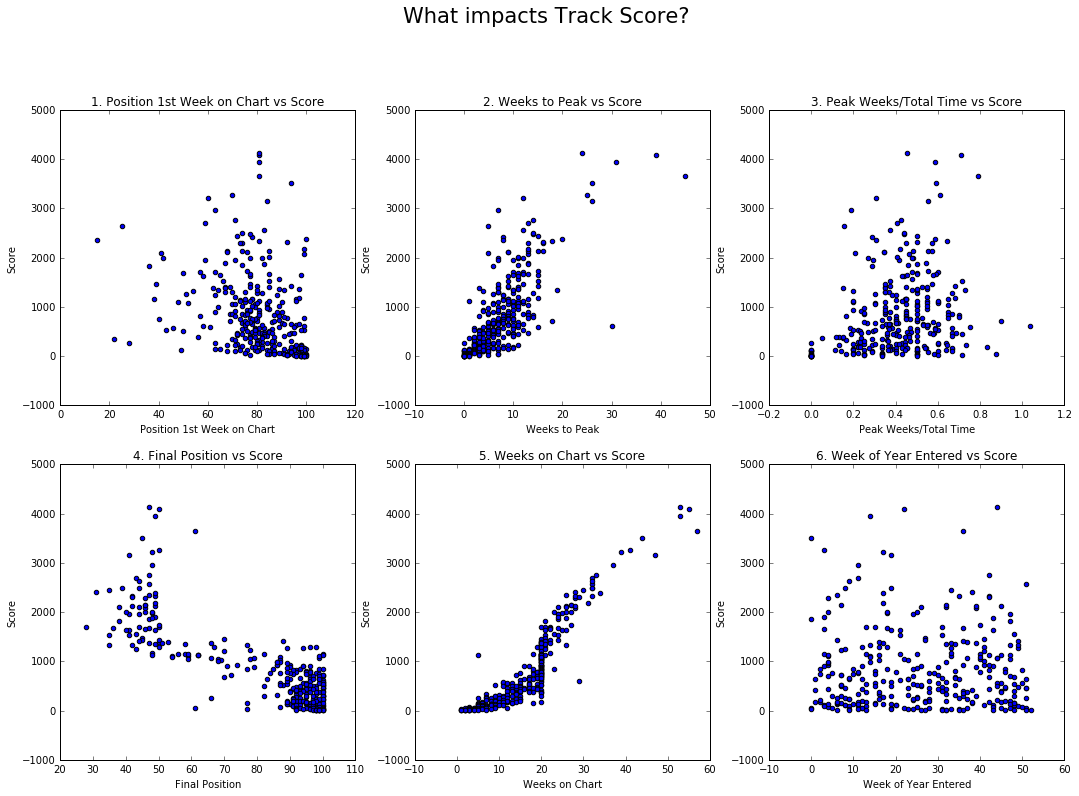

In [15]:
fig = plt.figure(figsize = (18,18))

ax1 = fig.add_subplot(331)
ax1.scatter(df['x1st.week'],df['score'])
ax1.set_title("1. Position 1st Week on Chart vs Score")
ax1.set_xlabel("Position 1st Week on Chart")
ax1.set_ylabel("Score")

ax2 = fig.add_subplot(332)
ax2.scatter(df['weekstopeak'],df['score'])
ax2.set_title("2. Weeks to Peak vs Score")
ax2.set_xlabel("Weeks to Peak")
ax2.set_ylabel("Score")

ax3 = fig.add_subplot(333)
ax3.scatter(df['peak%totaltime'],df['score'])
ax3.set_title("3. Peak Weeks/Total Time vs Score")
ax3.set_xlabel("Peak Weeks/Total Time")
ax3.set_ylabel("Score")

ax4 = fig.add_subplot(334)
ax4.scatter(df['finalposition'],df['score'])
ax4.set_title("4. Final Position vs Score")
ax4.set_xlabel("Final Position")
ax4.set_ylabel("Score")

ax5 = fig.add_subplot(335)
ax5.scatter(df['weeksonchart'],df['score'])
ax5.set_title("5. Weeks on Chart vs Score")
ax5.set_xlabel("Weeks on Chart")
ax5.set_ylabel("Score")

ax6 = fig.add_subplot(336)
ax6.scatter(df['weekofyearentered'],df['score'])
ax6.set_title("6. Week of Year Entered vs Score")
ax6.set_xlabel("Week of Year Entered")
ax6.set_ylabel("Score")

fig.suptitle('What impacts Track Score?', fontsize=21);


### The interesting takeaways from each chart are: 

1. 	The songs that charted higher on their first week are not significantly more likely to reach a higher score.
2. 	The songs that reached top scores did not peak until after their 25th week on the charts as opposed to hitting top 10 early and staying there.
3. 	The highest scoring songs peaked 50-80% of the way through their time on the charts.
4. 	Very Interesting - There is a clear cut off around 1000 points for songs with chart position worse than 50. This is explored further in the next section.
5. 	This chart makes sense. The longer a song is on the chart, the more points it will earn. The slope of the line increases after 20 weeks. This means more points are earned per week after this point so these songs are charted higher. This can be seen in graph 4.
6. 	The is no clear relationship between score and the time of year that a song debuted. It may be worth noting that 6 of the 8 songs that 3000 points debuted in the first half of the year. This may be coincidental given the small sample size.

To confirm the what we see in graph 5, it shows below by the value counts that an extraordinarily high number of songs fall of the chart after exactly 20 weeks.

In [16]:
df['weeksonchart'].value_counts()

20    82
15    14
5     13
11    12
9     12
17    12
12    11
19    10
21    10
6     10
7      9
13     8
14     8
24     8
3      8
18     8
8      7
10     7
26     7
4      7
32     6
22     6
28     5
2      5
16     4
1      4
27     4
23     3
25     2
29     2
53     2
55     1
30     1
31     1
33     1
34     1
37     1
39     1
41     1
44     1
47     1
57     1
Name: weeksonchart, dtype: int64

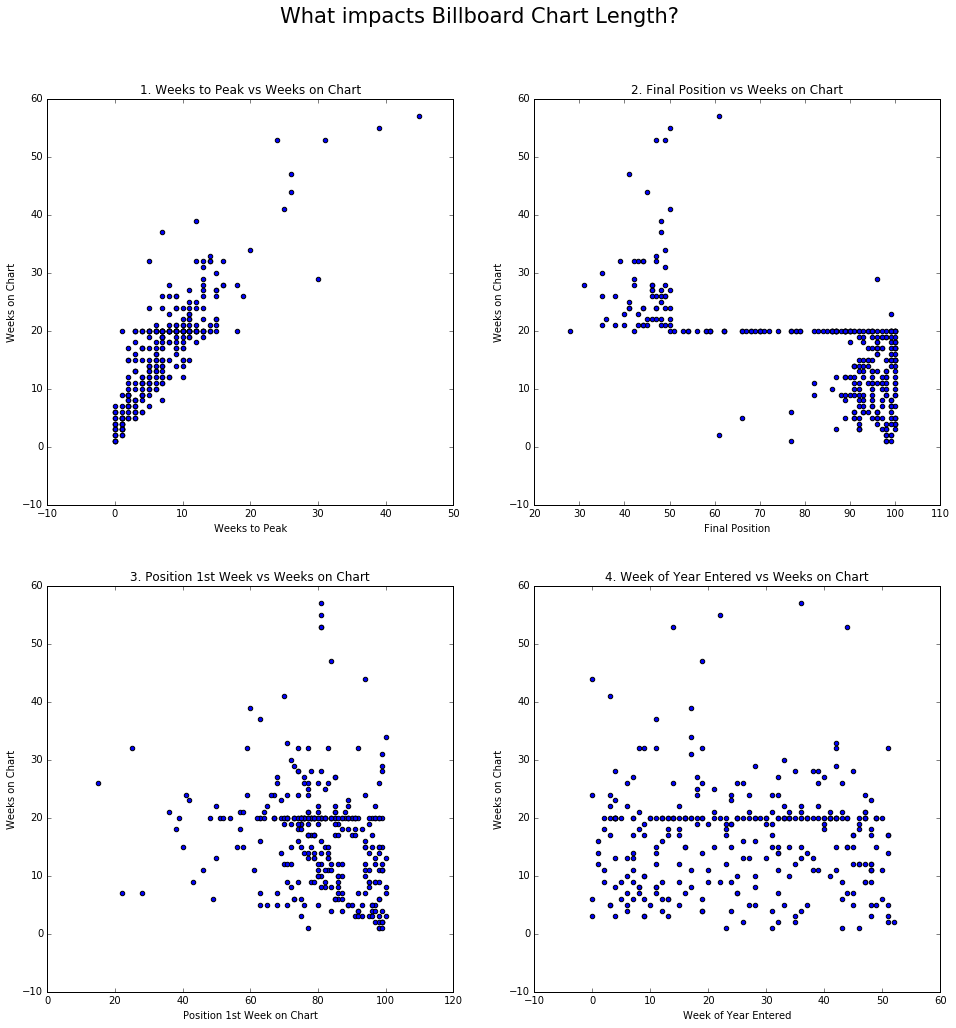

In [17]:
fig = plt.figure(figsize = (16,16))


ax1 = fig.add_subplot(221)
ax1.scatter(df['weekstopeak'],df['weeksonchart'])
ax1.set_title("1. Weeks to Peak vs Weeks on Chart")
ax1.set_xlabel("Weeks to Peak")
ax1.set_ylabel("Weeks on Chart")


ax2 = fig.add_subplot(222)
ax2.scatter(df['finalposition'],df['weeksonchart'])
ax2.set_title("2. Final Position vs Weeks on Chart")
ax2.set_xlabel("Final Position")
ax2.set_ylabel("Weeks on Chart")

ax3 = fig.add_subplot(223)
ax3.scatter(df['x1st.week'],df['weeksonchart'])
ax3.set_title("3. Position 1st Week vs Weeks on Chart")
ax3.set_xlabel("Position 1st Week on Chart")
ax3.set_ylabel("Weeks on Chart")

ax4 = fig.add_subplot(224)
ax4.scatter(df['weekofyearentered'],df['weeksonchart'])
ax4.set_title("4. Week of Year Entered vs Weeks on Chart")
ax4.set_xlabel("Week of Year Entered")
ax4.set_ylabel("Weeks on Chart")

fig.suptitle('What impacts Billboard Chart Length?', fontsize=21);


### The interesting takeaways from each chart are:

1. The longer that a song takes to peak, the longer it will be on the chart. 
2. Just about every song either spends less than 20 weeks and falls off the chart from a position between 80-100 or spend more than 20 weeks and end at a position between 30-50.
3. There is no real relationship between number of weeks on chart and the position at which a song enters the charts. As seen on chart two, it is worth noting that there is a collection of songs that ended after 20 weeks on the chart.
4. There is no real relationship between number of weeks on chart and the week in the calendar year in which it entered the charts. The same concentration of songs that ended on 20 weeks can be seen here as well.


After researching this, it turns out that Billboard had a policy at that time to drop a song from the chart if it had already charted for 20 weeks and fell below position 50. This explains the high number of songs on the chart for exactly 50 weeks seen in graphs 3 and 4 and also the only songs with weeks longer than 20 had higher chart positions seen in graph 2.

Graph 4 in the first section shows a clear divide between songs finishing their chart run between positions 80-100 and songs ending between positions 30-50. This happens around 1000 points, and this now makes sense given the 20 week and rank 50 threshold.

In [18]:
'''To test for the above, I pulled out songs whose final position was worse than 50 and weeks on chart was greater
than 20.'''

df['finalposition'] = df['finalposition'].astype(int)
tempdf = df[df['weeksonchart']>20]
tempdf = tempdf[tempdf['finalposition']>50]
tempdf

,year,artist,track,song.length,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x73rd.week,x74th.week,x75th.week,x76th.week,weeksonchart,weekstopeak,peak%totaltime,finalposition,weekofyearentered,score
46,2000,Creed,Higher,5.16,Rock'n'roll,1999-09-11,2000-07-22,81,77,73,...,NaN,NaN,NaN,NaN,57,45.0,0.789474,61,36,3656
98,2000,Mandy Moore,I Wanna Be With You,4.12,Pop,2000-06-17,2000-08-12,69,63,54,...,NaN,NaN,NaN,NaN,23,8.0,0.347826,99,24,847
157,2000,Amber,Sexual (Li Da Di),4.38,Rock,1999-07-17,2000-02-12,99,99,96,...,NaN,NaN,NaN,NaN,29,30.0,1.034483,96,28,601


*** The only songs that were on the charts more than 20 weeks and the final position was worse than 50 are listed above. After digging, these songs fell off the chart and then came back on for a second run!

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

There is an inverse relationship between the time a song takes to reach its peak position once entering the chart and the total time a song stays on the chart. In other words, the faster a song reaches its peak position, the fewer total weeks it spends on the chart.

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

1. What is the best way to represent a song's ascent? Should this be as the ratio of time spent climbing to the total time spent on the chart?
    a) To get this data, I will need to calculate the following: weeks a song was on the chart by counting the weeks not equal to np.nan, the weeks spent climbing which equals the date entered subtracted from the date peaked, and the percent time to peak which is weeks spent climbing divided by weeks on chart. 

2. What is best way to graphically represent this? I would imagine a scatter plot so that many data points can be shown.

3. What other variables may play a role in visualizing this data?



## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

In [19]:
def peakposition(value):
    peak = 100
    for i in value:
        if type(i) != float and int(i) < peak:
            peak = int(i)
    return peak
        
df['peakposition'] = df.iloc[:,7:83].apply(peakposition,axis=1)
df['climbrate'] = (df['x1st.week'] - df['peakposition'])/df['weekstopeak']
df.head()

,year,artist,track,song.length,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x75th.week,x76th.week,weeksonchart,weekstopeak,peak%totaltime,finalposition,weekofyearentered,score,peakposition,climbrate
0,2000,Destiny's Child,Independent Women Part I,3.38,Rock,2000-09-23,2000-11-18,78,63,49,...,NaN,NaN,28,8.0,0.285714,31,38,2413,1,9.625
1,2000,Santana,"Maria, Maria",4.18,Rock,2000-02-12,2000-04-08,15,8,6,...,NaN,NaN,26,8.0,0.307692,47,6,2353,1,1.750
2,2000,Savage Garden,I Knew I Loved You,4.07,Rock,1999-10-23,2000-01-29,71,48,43,...,NaN,NaN,33,14.0,0.424242,47,42,2760,1,5.000
3,2000,Madonna,Music,3.45,Rock,2000-08-12,2000-09-16,41,23,18,...,NaN,NaN,24,5.0,0.208333,44,32,2101,1,8.000
4,2000,Christina Aguilera,Come On Over Baby (All I Want Is You),3.38,Rock,2000-08-05,2000-10-14,57,47,45,...,NaN,NaN,21,10.0,0.476190,44,31,1702,1,5.600


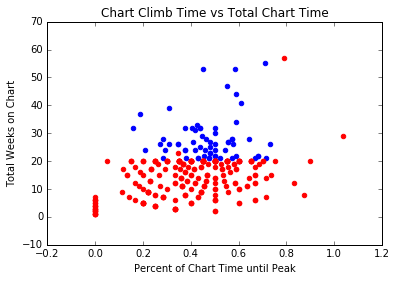

In [20]:
tempdfa = df[df['finalposition']<=50]
tempdfb = df[df['finalposition']>50]
plt.scatter(tempdfa['peak%totaltime'],tempdfa['weeksonchart'], color = 'blue');
plt.scatter(tempdfb['peak%totaltime'],tempdfb['weeksonchart'], color = 'red');
ax = plt.gca()
ax.set_xlabel('Percent of Chart Time until Peak')
ax.set_ylabel('Total Weeks on Chart');
ax.set_title('Chart Climb Time vs Total Chart Time');

The graph above shows the percent of the time a song spent climbing on the chart relative to the total time it spent ont the chart. The blue and red points represent songs whose final position was better and worse than 50, respectively. I hypothesized that the faster a song reached its peak, the fewer total weeks it would spend on the chart. There does appear to be a very slight quadratic relationshiph between these variables with the minimum value at 0.50. The stronger relationship is clearly between final position and weeks on chart after 20 weeks. 

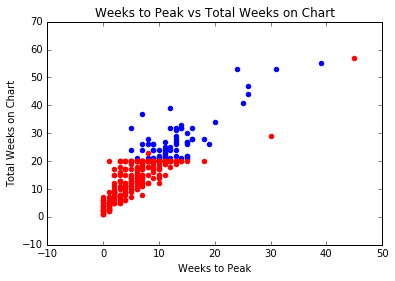

In [21]:
tempdfa = df[df['finalposition']<=50]
tempdfb = df[df['finalposition']>50]
plt.scatter(tempdfa['weekstopeak'],tempdfa['weeksonchart'], color = 'blue');
plt.scatter(tempdfb['weekstopeak'],tempdfb['weeksonchart'], color = 'red');
ax = plt.gca()
ax.set_xlabel('Weeks to Peak')
ax.set_ylabel('Total Weeks on Chart');
ax.set_title('Weeks to Peak vs Total Weeks on Chart');

This graph shows the relationship between total weeks spent on the chart and the number of weeks the song spent climbing to its peak position. The blue and red points show the final position the song held being better or worse than 50, respectively. There is a linear relationship between the number of weeks before a song peaked and the total number of weeks it spent on the chart. Again, we are also able to see the strong influence chart position after 20 weeks plays on a songs length of time on the chart.

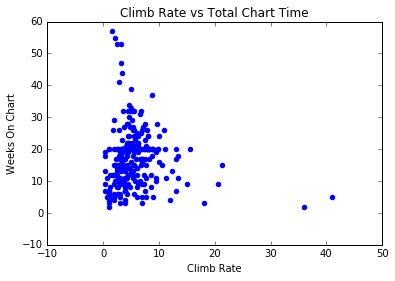

In [24]:
plt.scatter(df['climbrate'],df['weeksonchart'], color = 'blue');
ax = plt.gca()
ax.set_xlabel('Climb Rate')
ax.set_ylabel('Weeks On Chart');
ax.set_title('Climb Rate vs Total Chart Time');

There is no clear relationship between the rate at which a song climbed to its peak position and the number of weeks that it spent on the chart. If anything a slight positive relationship exists meaning that the faster a song reached its peak position, the more weeks it would likely spend on the chart.

https://github.com/tptirrell/tptirrell.github.io/blob/master/_posts/2016-6-23-BillboardCharts.md